# Part 2 of Elections and Demographics 

### 1. Libraries and Data Cleansing
### 2. Regression
### 3. Classification
### 4. Clustering

In [4]:
# 1. Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import plotly.figure_factory as ff
import geopandas
import shapefile


In [6]:
data = pd.read_csv('merged_train.csv')
data.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


In [7]:
# Put all features in a variable for easier coding
X = data[["Total Population",
          'Percent Hispanic or Latino',
          'Percent Foreign Born',
          'Percent Female',
          'Percent Age 29 and Under',
          'Percent Age 65 and Older',
          'Median Household Income',
          'Percent Unemployed',
          'Percent Less than High School Degree',
          "Percent Less than Bachelor's Degree",
          'Percent Black, not Hispanic or Latino',
          'Percent Rural',
          'Percent White, not Hispanic or Latino']]
democratic = data['Democratic']
republican = data['Republican']

## 2a. Regression Analysis For Democratic Counties.

In [8]:
x_train, x_val, y_train, y_val = train_test_split(X,democratic,test_size=0.25, random_state=0)

In [9]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled =  scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [21]:
# Ridge Regression using unemployed and population
model = Ridge(alpha=1).fit(X = x_train_scaled[:,[0,7]],y = y_train)
score_train = model.score(X = x_train_scaled[:,[0,7]],y = y_train)
score_val = model.score(X = x_val_scaled[:,[0,7]],y =y_val)
print([score_train,score_val])

[0.8638955059958013, 0.9174183588587426]


### The best performing regression model is Ridge regression and the performance obtained is 0.9174. After considering various combinations of predictor variables, we found that total population and percent unemployed gave a high performance for predicting the democratic votes

## 2a. Regression Analysis For Republican Counties.

In [10]:
x_train, x_val, y_train, y_val = train_test_split(X,republican,test_size=0.25, random_state=0)

In [11]:
# Standardisation of data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled =  scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [12]:
# Using all the variables 
model = LinearRegression().fit(X = x_train_scaled,y = y_train)
score_train = model.score(X = x_train_scaled,y = y_train)
score_val = model.score(X = x_val_scaled,y =y_val)
print([score_train,score_val])

[0.8673465255785223, 0.7004235899502081]


### We considered various combinations of variables and observed that the model performs well when all the variables are considered, we see that Ridge Regression perfomes well. For Republican, we get a validation score of 0.70045. 

# 3. Classification

In [13]:
X = data[["Total Population",
          'Percent Hispanic or Latino',
          'Percent Foreign Born',
          'Percent Female',
          'Percent Age 29 and Under',
          'Percent Age 65 and Older',
          'Median Household Income',
          'Percent Unemployed',
          'Percent Less than High School Degree',
          "Percent Less than Bachelor's Degree",
          'Percent Black, not Hispanic or Latino',
          'Percent Rural',
          'Percent White, not Hispanic or Latino']]
y = data['Party']

In [14]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.25,random_state=0)

In [15]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

[[216   6]
 [ 37  40]]


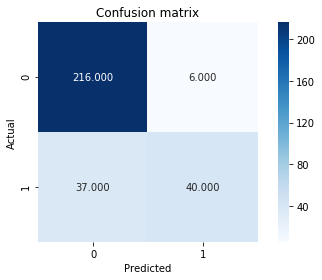

In [16]:
##SVM classifier on majority of variables using 'rbf' kernel
classifier = SVC(kernel = 'rbf')  
classifier.fit(x_train_scaled, y_train)
y_pred = classifier.predict(x_val_scaled)
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [17]:
accuracy = metrics.accuracy_score(y_val, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85375494, 0.86956522]), array([0.97297297, 0.51948052]), array([0.90947368, 0.6504065 ])]


### The best performing classification model is SVM with a F1 score 0.9 and 0.65 for the two classes using 'rbf' kernel, considering all the variables as predictors. 

# 4. Clustering

In [18]:
X = data.drop(columns=['Party','State','County','FIPS','Democratic','Republican'])
Y = data['Party']

In [19]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [20]:
# Kmeans using all variables and random initialization of centroids
clustering = KMeans(n_clusters=2,init='random',n_init=10,random_state=0).fit(X_scaled)
clusters = clustering.labels_

print(clusters)
print(np.unique(clusters))

[0 0 0 ... 0 1 1]
[0 1]


[[160 710]
 [175 150]]


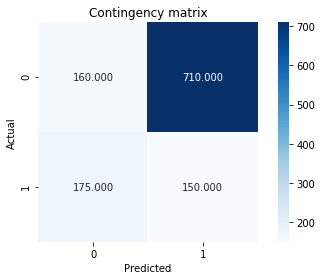

In [21]:
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
print(cont_matrix)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [22]:
adjusted_rand_index = metrics.adjusted_rand_score(Y,clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.19893799165776016, 0.30691597445230206]


In [23]:
accuracy = metrics.accuracy_score(Y, clusters)
error = 1 - accuracy
precision = metrics.precision_score(Y, clusters, average = None)
recall = metrics.recall_score(Y,clusters, average = None)
F1_score = metrics.f1_score(Y,clusters, average = None)
print([accuracy, error, precision, recall, F1_score])
print(accuracy)

[0.2594142259414226, 0.7405857740585774, array([0.47761194, 0.1744186 ]), array([0.18390805, 0.46153846]), array([0.26556017, 0.25316456])]
0.2594142259414226


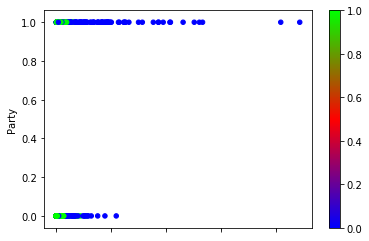

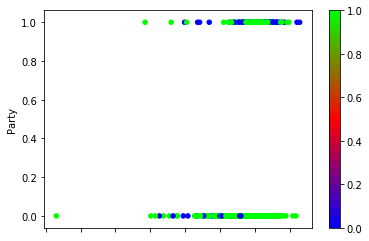

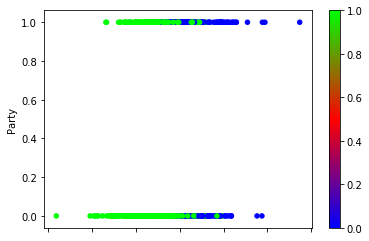

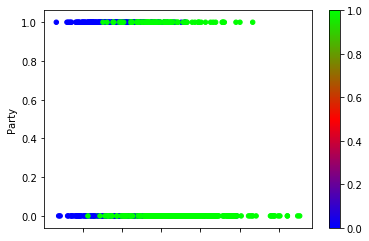

In [24]:
ax = data.plot(kind = 'scatter', x = 'Total Population', y = 'Party', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Percent Female', y = 'Party', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Percent Age 29 and Under', y = 'Party', c = clusters, colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Percent Age 65 and Older', y = 'Party', c = clusters, colormap = plt.cm.brg)

### From our observations, we found that K-means clustering is the best performing model. We got an accuracy of 0.7631 and silhouette coefficient of 0.4002 when we considered the total population and gender variables. Also, we obtained this when we considered 'random' initialization of centers.